## Learning curves of online learning algorithms

The second experiment is a learning curve experiment for all the algorithms. Fix l=10,m=20. You will vary n,the number of variables,from n=40 to n=200 in increments of 40. Notice that by increasing the value of n, you are making the function sparse. For each of the 5 diferent functions, you first generate a dataset with 50,000 examples. Tune the parameters of each algorithm following the instructions in the previous section. Note that you have five diferent training sets (for diferent values of n), so you need to tune each algorithm for each of these separately. 

In [71]:
from add_noise import add_noise
from gen import gen
import numpy as np
import math
import matplotlib.pyplot as plt

In [35]:
def perceptron(x, y):
    eta = 1
    m, n = x.shape
    w = np.zeros(n)
    theta = 0
    for i in range(20):
        for j in range(m):
            if (np.dot(w, x[j, :]) + theta) * y[j] <= 0:
                w += eta * y[j] * x[j, :]
                theta += eta * y[j]
    return w, theta

def perceptron_margin(x, y, eta):
    m, n = x.shape
    w = np.zeros(n)
    theta = 0
    for i in range(20):
        for j in range(m):
            if (np.dot(w, x[j, :]) + theta) * y[j] <= 1:
                w += eta * y[j] * x[j, :]
                theta += eta * y[j]
    return w, theta

def winnow(x, y, alpha):
    m, n = x.shape
    w = np.ones(n)
    theta = -n
    for i in range(20):
        for j in range(m):
            if (np.dot(w, x[j, :]) + theta) * y[j] <= 0:
                for k in range(n):
                    w[k] = w[k] * alpha**(y[j]*x[j, k])
    return w, theta

def winnow_margin(x, y, alpha, gamma):
    m, n = x.shape
    w = np.ones(n)
    theta = -n
    for i in range(20):
        for j in range(m):
            if (np.dot(w, x[j, :]) + theta) * y[j] <= gamma:
                for k in range(n):
                    w[k] = w[k] * alpha**(y[j]*x[j, k])
    return w, theta

def adagrad(x, y, eta):
    m, n = x.shape
    w = np.append(np.ones(n), [-n])
    G = np.zeros(n+1)

    for i in range(20):
        for j in range(m):
            if (np.dot(w[:n], x[j, :]) + w[n]) * y[j] <= 1:
                # that gradient is -yx, and for $\theta$, it is always -y.
                g = np.append(-y[j] * x[j, :], -y[j])
                G += np.square(g)
                for k in range(n+1):
                    if G[k] != 0:
                        w[k] = w[k] - eta * g[k] / np.sqrt(G[k])
    return w[:n], w[n]

def accuracy(w, theta, x, y):
    correct = 0
    m, _ = x.shape
    for i in range(m):
        if (np.dot(w, x[i, :]) + theta) * y[i] >=0:
            correct += 1
    return 1.0*correct/m

In [39]:
def perceptron_R(x, y):
    eta = 1
    m, n = x.shape
    w = np.zeros(n)
    theta = 0
    
    error = 0
    total = 0
    R = 1000
    
    while total < R:
        for j in range(m):
            if (np.dot(w, x[j, :]) + theta) * y[j] <= 0:
                total = 0
                error += 1
                w += eta * y[j] * x[j, :]
                theta += eta * y[j]
            else:
                total += 1
                if total >= R:
                    return error

def perceptron_margin_R(x, y, eta):
    m, n = x.shape
    w = np.zeros(n)
    theta = 0
    
    error = 0
    total = 0
    R = 1000
    
    while total < R:
        for j in range(m):
            if (np.dot(w, x[j, :]) + theta) * y[j] <= 0:
                total = 0
                error += 1
            else:
                total += 1
                if total >= R:
                    return error

            if (np.dot(w, x[j, :]) + theta) * y[j] <= 1:
                w += eta * y[j] * x[j, :]
                theta += eta * y[j]


def winnow_R(x, y, alpha):
    m, n = x.shape
    w = np.ones(n)
    theta = -n
    
    error = 0
    total = 0
    R = 1000
    
    while total < R:
        for j in range(m):
            if (np.dot(w, x[j, :]) + theta) * y[j] <= 0:
                total = 0
                error += 1
                for k in range(n):
                    w[k] = w[k] * alpha**(y[j]*x[j, k])
            else:
                total += 1
                if total >= R:
                    return error


def winnow_margin_R(x, y, alpha, gamma):
    m, n = x.shape
    w = np.ones(n)
    theta = -n
    
    error = 0
    total = 0
    R = 1000
    
    while total < R:
        for j in range(m):
            if (np.dot(w, x[j, :]) + theta) * y[j] <= 0:
                total = 0
                error += 1
            else:
                total += 1
                if total >= R:
                    return error
                
            if (np.dot(w, x[j, :]) + theta) * y[j] <= gamma:
                for k in range(n):
                    w[k] = w[k] * alpha**(y[j]*x[j, k])


def adagrad_R(x, y, eta):
    m, n = x.shape
    w = np.append(np.ones(n), [-n])
    G = np.zeros(n+1)
    
    error = 0
    total = 0
    R = 1000
    
    while total < R:
        for j in range(m):
            if (np.dot(w[:n], x[j, :]) + w[n]) * y[j] <= 0:
                total = 0
                error += 1
            else:
                total += 1
                if total >= R:
                    return error
                
            if (np.dot(w[:n], x[j, :]) + w[n]) * y[j] <= 1:
                # that gradient is -yx, and for $\theta$, it is always -y.
                g = np.append(-y[j] * x[j, :], -y[j])
                G += np.square(g)
                for k in range(n+1):
                    if G[k] != 0:
                        w[k] = w[k] - eta * g[k] / np.sqrt(G[k])



In [18]:
x, x_train, x_test, y_train, y_test = [], [], [], [], []
for step in range(40, 240, 40):
    data = gen(10, 20, step, 50000, False)
    x.append(data)
    x_train.append(data[1][:5000, :])
    y_train.append(data[0][:5000])
    x_test.append(data[1][5001:10000, :])
    y_test.append(data[0][5001:10000])
    


In [6]:
perceptron_params = [1.5,0.25,0.03,0.005,0.001]
winnow_params = [1.1,1.01,1.005,1.0005,1.0001]
winnow_margin_params1 = [1.1,1.01,1.005,1.0005,1.0001]
winnow_margin_params2 = [2.0,0.3,0.04,0.006,0.001]
adagrad_params = [1.5,0.25,0.03,0.005,0.001]

In [29]:
for i in range(5):
    ans = {}
    for eta in perceptron_params:
        w, theta = perceptron_margin(x_train[i], y_train[i], eta);
        acc = accuracy(w, theta, x_test[i], y_test[i]);
        print("Perceptron_Margin : eta = {}, accuracy = {}".format(eta, acc))
        ans[eta] = acc
    print("The best eta is {}".format(sorted(ans.items(), key=lambda x: -x[1])[0][0]))


Perceptron_Margin : eta = 1.5, accuracy = 1.0
Perceptron_Margin : eta = 0.25, accuracy = 1.0
Perceptron_Margin : eta = 0.03, accuracy = 1.0
Perceptron_Margin : eta = 0.005, accuracy = 1.0
Perceptron_Margin : eta = 0.001, accuracy = 0.999799959992
The best eta is 1.5
Perceptron_Margin : eta = 1.5, accuracy = 1.0
Perceptron_Margin : eta = 0.25, accuracy = 1.0
Perceptron_Margin : eta = 0.03, accuracy = 1.0
Perceptron_Margin : eta = 0.005, accuracy = 1.0
Perceptron_Margin : eta = 0.001, accuracy = 0.939787957592
The best eta is 1.5
Perceptron_Margin : eta = 1.5, accuracy = 0.999599919984
Perceptron_Margin : eta = 0.25, accuracy = 0.999599919984
Perceptron_Margin : eta = 0.03, accuracy = 1.0
Perceptron_Margin : eta = 0.005, accuracy = 1.0
Perceptron_Margin : eta = 0.001, accuracy = 0.941188237648
The best eta is 0.005
Perceptron_Margin : eta = 1.5, accuracy = 1.0
Perceptron_Margin : eta = 0.25, accuracy = 0.999599919984
Perceptron_Margin : eta = 0.03, accuracy = 1.0
Perceptron_Margin : eta 

In [32]:
for i in range(5):
    ans = {}
    for alpha in winnow_params:
        w, theta = winnow(x_train[i], y_train[i], alpha);
        acc = accuracy(w, theta, x_test[i], y_test[i]);
        print("winnow : alpha = {}, accuracy = {}".format(alpha, acc))
        ans[alpha] = acc
    print("The best alpha is {}".format(sorted(ans.items(), key=lambda x: -x[1])[0][0]))

winnow : alpha = 1.1, accuracy = 0.999599919984
winnow : alpha = 1.01, accuracy = 0.998399679936
winnow : alpha = 1.005, accuracy = 0.99799959992
winnow : alpha = 1.0005, accuracy = 0.957791558312
winnow : alpha = 1.0001, accuracy = 0.744348869774
The best alpha is 1.1
winnow : alpha = 1.1, accuracy = 0.999199839968
winnow : alpha = 1.01, accuracy = 0.99699939988
winnow : alpha = 1.005, accuracy = 0.996799359872
winnow : alpha = 1.0005, accuracy = 0.882376475295
winnow : alpha = 1.0001, accuracy = 0.623324664933
The best alpha is 1.1
winnow : alpha = 1.1, accuracy = 0.999799959992
winnow : alpha = 1.01, accuracy = 0.993198639728
winnow : alpha = 1.005, accuracy = 0.99299859972
winnow : alpha = 1.0005, accuracy = 0.821564312863
winnow : alpha = 1.0001, accuracy = 0.601920384077
The best alpha is 1.1
winnow : alpha = 1.1, accuracy = 0.999599919984
winnow : alpha = 1.01, accuracy = 0.99599919984
winnow : alpha = 1.005, accuracy = 0.992798559712
winnow : alpha = 1.0005, accuracy = 0.768953

In [36]:
for i in range(5):
    ans = {}
    for alpha in winnow_margin_params1:
        for gamma in winnow_margin_params2:
            w, theta = winnow_margin(x_train[i], y_train[i], alpha, gamma);
            acc = accuracy(w, theta, x_test[i], y_test[i]);
            print("winnow_Margin : alpha = {}, gamma = {}, accuracy = {}".format(alpha, gamma, acc))
            ans[tuple((alpha,gamma))] = acc
    print("The best alpha, gamma is {}".format(sorted(ans.items(), key=lambda x: -x[1])[0][0]))

winnow_Margin : alpha = 1.1, gamma = 2.0, accuracy = 1.0
winnow_Margin : alpha = 1.1, gamma = 0.3, accuracy = 0.999799959992
winnow_Margin : alpha = 1.1, gamma = 0.04, accuracy = 1.0
winnow_Margin : alpha = 1.1, gamma = 0.006, accuracy = 0.999599919984
winnow_Margin : alpha = 1.1, gamma = 0.001, accuracy = 0.999599919984
winnow_Margin : alpha = 1.01, gamma = 2.0, accuracy = 1.0
winnow_Margin : alpha = 1.01, gamma = 0.3, accuracy = 0.999399879976
winnow_Margin : alpha = 1.01, gamma = 0.04, accuracy = 0.998399679936
winnow_Margin : alpha = 1.01, gamma = 0.006, accuracy = 0.998399679936
winnow_Margin : alpha = 1.01, gamma = 0.001, accuracy = 0.998399679936
winnow_Margin : alpha = 1.005, gamma = 2.0, accuracy = 1.0
winnow_Margin : alpha = 1.005, gamma = 0.3, accuracy = 0.999199839968
winnow_Margin : alpha = 1.005, gamma = 0.04, accuracy = 0.99799959992
winnow_Margin : alpha = 1.005, gamma = 0.006, accuracy = 0.99799959992
winnow_Margin : alpha = 1.005, gamma = 0.001, accuracy = 0.997799559

In [38]:
for i in range(5):
    ans = {}
    for eta in adagrad_params:
        w, theta = adagrad(x_train[i], y_train[i], eta);
        acc = accuracy(w, theta, x_test[i], y_test[i]);
        print("adagrad : eta = {}, accuracy = {}".format(eta, acc))
        ans[eta] = acc
    print("The best eta is {}".format(sorted(ans.items(), key=lambda x: -x[1])[0][0]))

adagrad : eta = 1.5, accuracy = 1.0
adagrad : eta = 0.25, accuracy = 1.0
adagrad : eta = 0.03, accuracy = 0.917983596719
adagrad : eta = 0.005, accuracy = 0.679135827165
adagrad : eta = 0.001, accuracy = 0.49549909982
The best eta is 1.5
adagrad : eta = 1.5, accuracy = 0.999799959992
adagrad : eta = 0.25, accuracy = 0.997799559912
adagrad : eta = 0.03, accuracy = 0.697539507902
adagrad : eta = 0.005, accuracy = 0.597919583917
adagrad : eta = 0.001, accuracy = 0.509901980396
The best eta is 1.5
adagrad : eta = 1.5, accuracy = 0.998599719944
adagrad : eta = 0.25, accuracy = 0.983596719344
adagrad : eta = 0.03, accuracy = 0.646729345869
adagrad : eta = 0.005, accuracy = 0.579915983197
adagrad : eta = 0.001, accuracy = 0.500900180036
The best eta is 1.5
adagrad : eta = 1.5, accuracy = 0.998199639928
adagrad : eta = 0.25, accuracy = 0.950590118024
adagrad : eta = 0.03, accuracy = 0.617123424685
adagrad : eta = 0.005, accuracy = 0.563312662533
adagrad : eta = 0.001, accuracy = 0.498299659932

In [64]:
w_perceptron =          []
w_perceptron_margin =   []
w_winnow =              []
w_winnow_margin =       []
w_adagrad =             []
perceptron_margin_params =  [1.5,1.5,0.005,1.5,0.25]
winnow_params =             [1.1,1.1,1.1,1.1,1.1]
winnow_margin_params1 =     [1.1,1.1,1.1,1.1,1.1]
winnow_margin_params2 =     [2,2,2,2,2]
adagrad_params =            [1.5,1.5,1.5,1.5,1.5]

In [65]:
for i in range(5):
    w_perceptron.append(perceptron_R(x[i][1], x[i][0]))
    w_perceptron_margin.append(perceptron_margin_R(x[i][1], x[i][0], perceptron_margin_params[i]))
    w_winnow.append(winnow_R(x[i][1], x[i][0], winnow_params[i]))
    w_winnow_margin.append(winnow_margin_R(x[i][1], x[i][0], winnow_margin_params1[i], winnow_margin_params2[i]))
    w_adagrad.append(adagrad_R(x[i][1], x[i][0], adagrad_params[i]))

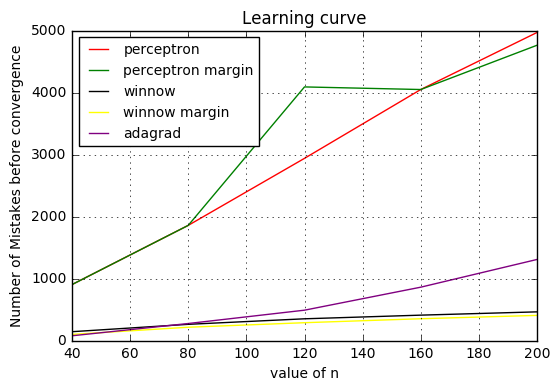

In [75]:
plt.gca().set_color_cycle(['red', 'green', 'black', 'yellow', 'purple'])
labels = [40, 80, 120, 160, 200]

plt.plot(labels, w_perceptron)
plt.plot(labels, w_perceptron_margin)
plt.plot(labels, w_winnow)
plt.plot(labels, w_winnow_margin)
plt.plot(labels, w_adagrad)
plt.legend(['perceptron', 'perceptron margin', 'winnow', 'winnow margin', 'adagrad'],
           loc='upper left', prop={'size':10})
plt.title('Learning curve')
plt.ylabel('Number of Mistakes before convergence')
plt.xlabel('value of n')
plt.grid()
plt.show()